In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import PercentFormatter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        maplesyrup_df = pd.read_csv(os.path.join(dirname, filename))

In [2]:
maplesyrup_df['State'] = maplesyrup_df['State'].str.strip()
maplesyrup_df

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,2/15/2021,4/30/2021,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,2/1/2021,4/14/2021,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,1/11/2021,4/16/2021,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,1/1/2021,5/4/2021,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,1/4/2021,4/15/2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,New York,1163,0.166,193,29.0,"6,090",28.1,24.3,1.35,15,NaN,NaN,2000
216,Ohio,432,0.222,96,34.3,"1,166",28.8,27.2,1.45,15.8,NaN,NaN,2000
217,Pennsylvania,360,0.192,69,28.4,"1,335",29.0,27.1,1.3,14.4,NaN,NaN,2000
218,Vermont,2090,0.132,275,30.0,"13,800",31.6,26.4,1.6,17.6,NaN,NaN,2000


What are the highest correlating factors of maple syrup production?

/tmp/ipykernel_20/2124206654.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(maplesyrup_df.corr(), cbar=True, annot=True,cmap='Blues')


<Axes: >

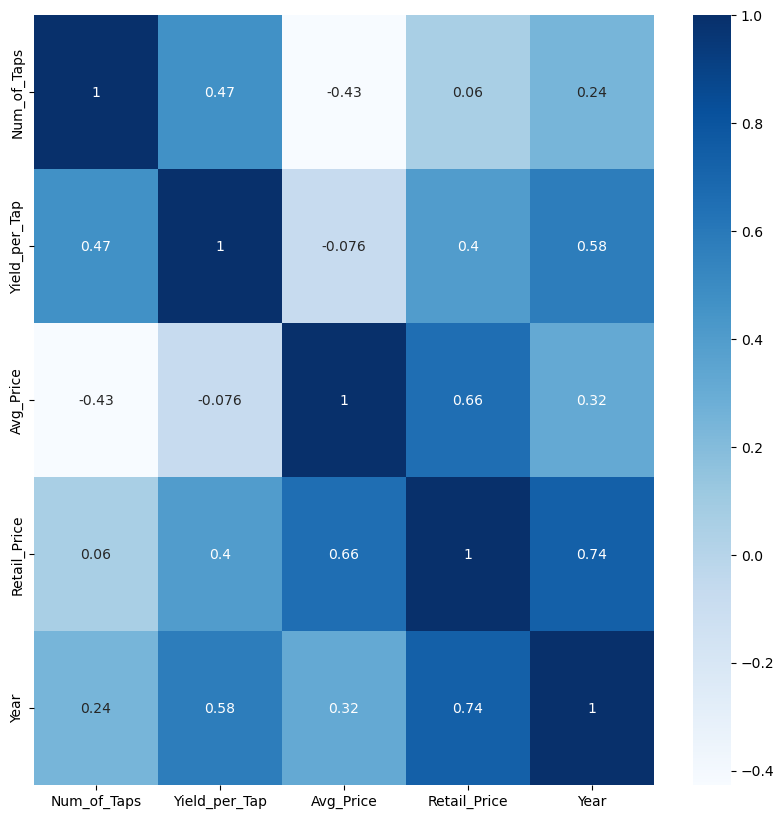

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(maplesyrup_df.corr(), cbar=True, annot=True,cmap='Blues')

What state had the longest harvesting season in 2010 and how did this affect the production of maple syrup?

<BarContainer object of 10 artists>

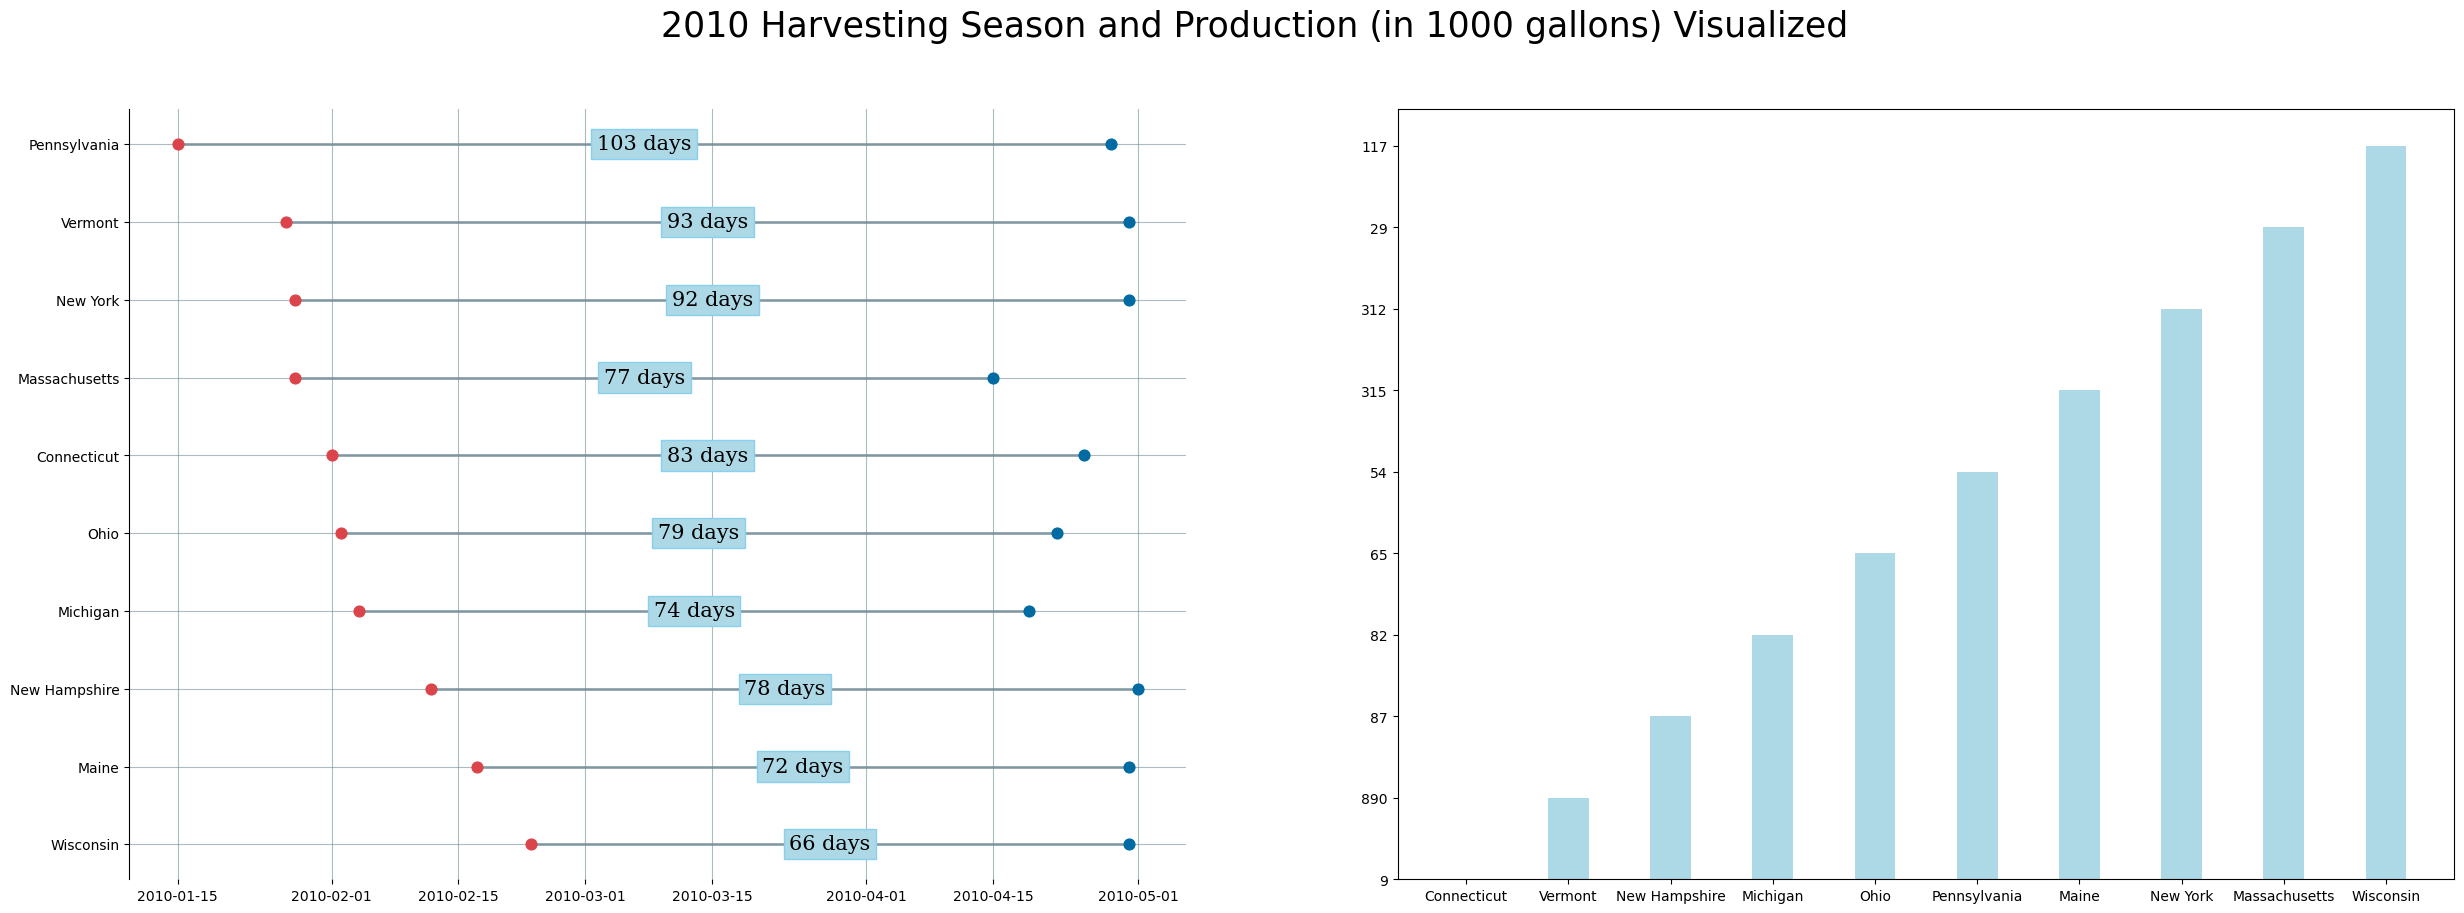

In [4]:
#Create Copy of Dataframe and Filter for 2010 and the Date COlumns
maple_syrup_days = maplesyrup_df.copy()
maple_syrup_days_2010 = maple_syrup_days[maple_syrup_days['Year'] == 2010]
maple_syrup_days['Date_Open'] = pd.to_datetime(maple_syrup_days_2010['Date_Open'])
maple_syrup_days['Date_Closed'] = pd.to_datetime(maple_syrup_days_2010['Date_Closed'])
maple_syrup_days = maple_syrup_days.drop(columns=['Num_of_Taps', 'Yield_per_Tap', 'Production', 'Avg_Price', 'Value', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price', 'Year'])
maple_syrup_days= maple_syrup_days.pivot_table(index='State', values=['Date_Open', 'Date_Closed']).sort_values(by= 'Date_Open', ascending=False)
maple_syrup_days.head()

# Plot Dumbbell Chart Visualizing the Harvesting Seasons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10), facecolor = "white")
fig.suptitle('2010 Harvesting Season and Production (in 1000 gallons) Visualized', fontsize=25)

ax1.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)
ax1.spines[['top','right','bottom']].set_visible(False)

ax1.hlines(y=maple_syrup_days.index, xmin=maple_syrup_days['Date_Open'], xmax=maple_syrup_days['Date_Closed'], color='#758D99', zorder=2, linewidth=2, label='_nolegend_', alpha=.8)

ax1.scatter(maple_syrup_days['Date_Open'], maple_syrup_days.index, s=60, color='#DB444B', zorder=3)
ax1.scatter(maple_syrup_days['Date_Closed'], maple_syrup_days.index, s=60, color='#006BA2', zorder=3)

for index, row in maple_syrup_days.iterrows():
    year = 2010
    opened_day = row['Date_Open'].dayofyear
    closed_day = row['Date_Closed'].dayofyear
    difference = closed_day - opened_day
    median_day = (closed_day + opened_day)/2
    median_date = datetime.datetime(year, 1, 1) + datetime.timedelta(median_day - 1)

    ax1.text(median_date, index, f'{int(difference)} days', c='black', va='center', ha='center', fontsize=15, fontfamily='serif').set_bbox(dict(facecolor='#ADD8E6', alpha=1, edgecolor='#89CFF0'))
    
# Plot Bar Chart Visualizing Production Amounts
maple_syrup_days_2010 = maple_syrup_days_2010.sort_values(by= ['Production'], ascending=False)
ax2.bar(maple_syrup_days_2010['State'], maple_syrup_days_2010['Production'], color ='#ADD8E6',
        width = 0.4)

How has the amount of syrup taps used changed over time for Vermont's, New York's, and Michigan's production?

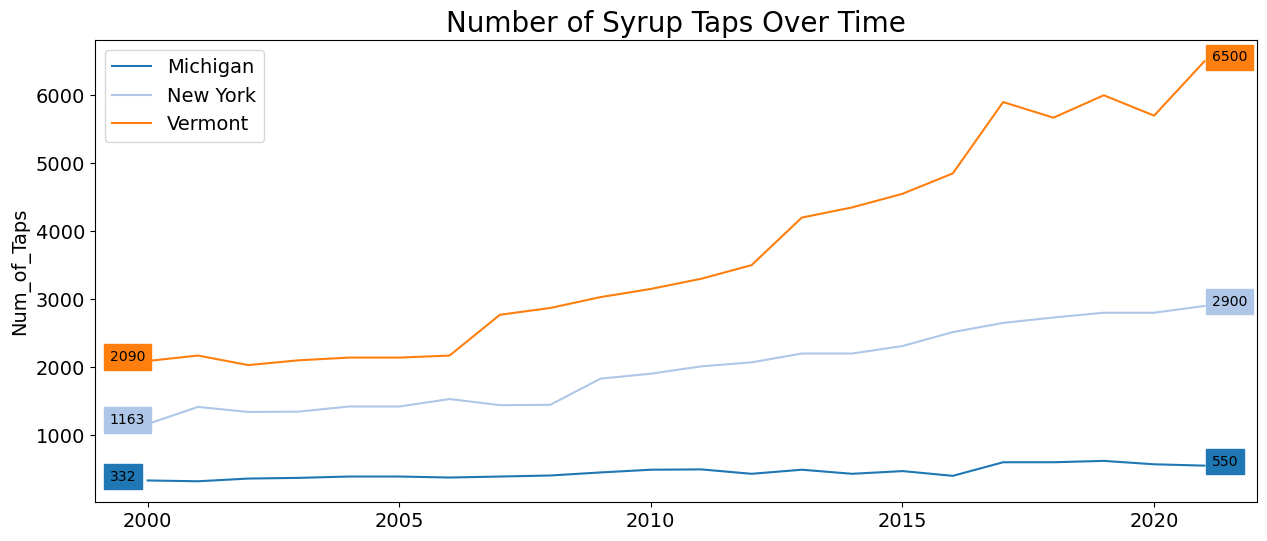

In [5]:
# Create Copy of data and clean
maplesyrup_taps_df = maplesyrup_df.copy()
maplesyrup_taps_df = maplesyrup_taps_df[maplesyrup_taps_df["State"].isin(['Vermont','New York', 'Michigan'])]

color_dict = {val: plt.cm.tab20(i) for i, val in enumerate(maplesyrup_taps_df['State'].unique())}

#Plot Line Chart
plt.figure(figsize=(15,6))
for state in maplesyrup_taps_df.State.unique(): 
    temp_table = maplesyrup_taps_df[maplesyrup_taps_df['State'] == state]
    plt.plot(temp_table['Year'], temp_table['Num_of_Taps'], label=str(state), color=color_dict[state])
    
    for index, row in temp_table[0:1].iterrows():
        plt.text(row['Year']+.15, row['Num_of_Taps'], row['Num_of_Taps'], fontsize=10).set_bbox(dict(facecolor=color_dict[state], alpha=1, edgecolor=color_dict[state]))
        
    for index, row in temp_table[len(temp_table)-1:len(temp_table)].iterrows():
        plt.text(row['Year']-.75, row['Num_of_Taps'], row['Num_of_Taps'], fontsize=10).set_bbox(dict(facecolor=color_dict[state], alpha=1, edgecolor=color_dict[state]))
# plot lines
plt.legend(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel("Num_of_Taps", fontsize=14)
plt.xticks(fontsize=14)
plt.title("Number of Syrup Taps Over Time", fontsize=20)
plt.show()